In [71]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from mpl_toolkits import mplot3d
from math import *

# Question 1

# (a)

In [72]:
#uij = mean of i-th class and j-th dimension
u11 = 0.5
u12 = 0.8
u21 = 0.9
u22 = 0.2

In [73]:
rv11 = bernoulli.rvs(u11,size = 100)
rv12 = bernoulli.rvs(u12,size = 100)
rv21 = bernoulli.rvs(u21,size = 100)
rv22 = bernoulli.rvs(u22,size = 100)

In [74]:
data1 = {}
data2 = {}

c1 = [1]*100
c2 = [2]*100

data1['f1'] = list(rv11)
data1['f2'] = list(rv12)
data1['class'] = c1
data2['f1'] = list(rv21)
data2['f2'] = list(rv22)
data2['class']= c2

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [75]:
print('Data generation')
print(df1)
print(df2)

Data generation
    f1  f2  class
0    1   1      1
1    0   1      1
2    1   1      1
3    0   0      1
4    1   1      1
..  ..  ..    ...
95   1   1      1
96   1   1      1
97   0   1      1
98   1   1      1
99   1   1      1

[100 rows x 3 columns]
    f1  f2  class
0    1   0      2
1    1   0      2
2    1   0      2
3    1   0      2
4    1   0      2
..  ..  ..    ...
95   1   0      2
96   1   0      2
97   1   0      2
98   0   1      2
99   0   0      2

[100 rows x 3 columns]


# MLE

In [76]:
def computeMLE(xi, n):
  return sum(xi[:n])/n

In [77]:
def plotN_MLE(l,s):

  x = []
  y = []

  for i in range(1,51):
    x.append(i)
    y.append(computeMLE(l,i))

  plt.plot(x, y)
  plt.xlabel("n")  
  plt.ylabel("MLE")  
  plt.title(s)  
  plt.show()

# (b)

In [78]:
# split a dataset into train and test sets
features1 = df1.loc[ : , df1.columns != 'class']
labels1 = pd.DataFrame(df1['class'])

# split into train test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, labels1, test_size=0.50, random_state = 0)

In [79]:
u11_mle = computeMLE(X_train1['f1'].tolist(),50)
u12_mle = computeMLE(X_train1['f2'].tolist(),50)
u1_mle = np.array([u11_mle,u12_mle])
print('The MLE for class 1 is')
print(u1_mle)

The MLE for class 1 is
[0.4  0.78]


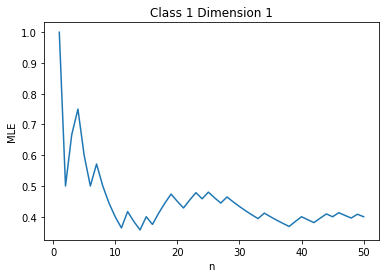

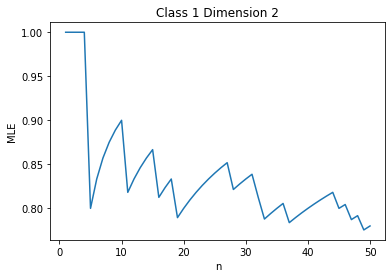

In [80]:
plotN_MLE(X_train1['f1'].tolist(),'Class 1 Dimension 1')
plotN_MLE(X_train1['f2'].tolist(),'Class 1 Dimension 2')

# (c)

In [81]:
# split a dataset into train and test sets
features2 = df2.loc[ : , df2.columns != 'class']
labels2 = pd.DataFrame(df2['class'])

# split into train test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.50, random_state = 0)

In [82]:
u21_mle = computeMLE(X_train2['f1'].tolist(),50)
u22_mle = computeMLE(X_train2['f2'].tolist(),50)
u2_mle = np.array([u21_mle,u22_mle])
print('The MLE for class 2 is')
print(u2_mle)

The MLE for class 2 is
[0.9 0.2]


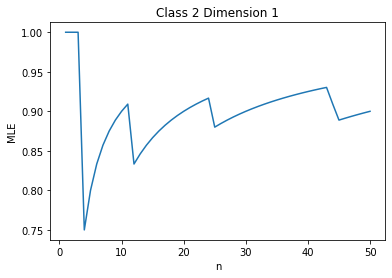

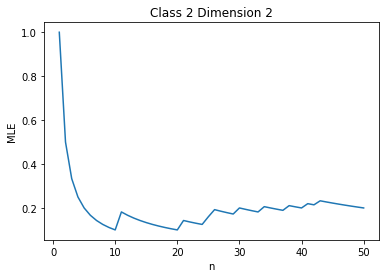

In [83]:
plotN_MLE(X_train2['f1'].tolist(),'Class 2 Dimension 1')
plotN_MLE(X_train2['f2'].tolist(),'Class 2 Dimension 2')

# (d)

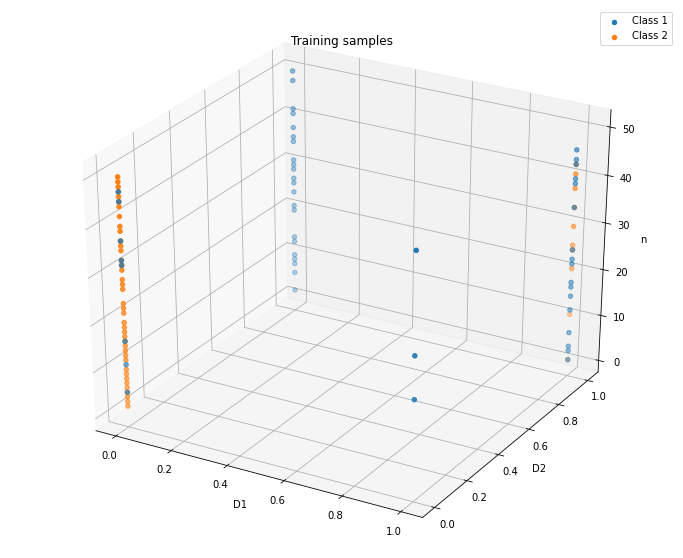

In [84]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')

z = []
for i in range(0,50):
  z.append(i+1)

x = X_train1['f1'].tolist()
y = X_train1['f2'].tolist()

# plotting
ax.scatter3D(x, y, z, label='Class 1')

x = X_train2['f2'].tolist()
y = X_train2['f2'].tolist()

ax.scatter3D(x, y, z, label='Class 2')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('n')
ax.set_title('Training samples')
plt.legend()
plt.show()


# (e)

In [85]:
def discriminant(mu11, mu12, mu21, mu22, x1, x2):
  d1 = pow(mu11, x1)*pow(1-mu11, 1-x1)*pow(mu12, x2)*pow(1-mu12, 1-x2)
  d2 = pow(mu21, x1)*pow(1-mu21, 1-x1)*pow(mu22, x2)*pow(1-mu22, 1-x2)
  if d1>=d2:
    return 1
  else:
    return 2

In [86]:
X_test1_f1 = X_test1['f1'].tolist()
X_test1_f2 = X_test1['f2'].tolist()
pred1 = []
for i in range(50):
  d = discriminant(u11, u12, u21, u22, X_test1_f1[i], X_test1_f2[i])
  pred1.append(d)

In [87]:
X_test2_f1 = X_test2['f1'].tolist()
X_test2_f2 = X_test2['f2'].tolist()
pred2 = []
for i in range(50):
  d = discriminant(u11, u12, u21, u22, X_test2_f1[i], X_test2_f2[i])
  pred2.append(d)

In [88]:
num1 = 0
num2 = 0

for i in range(50):
  if pred1[i]==1:
    num1 += 1
  if pred2[i]==2:
    num2 += 1

print('Accuracy for class 1')
print(num1/50)
print('Accuracy for class 2')
print(num2/50)

Accuracy for class 1
0.94
Accuracy for class 2
0.72
